In [1]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append('..')
from helper import *

setwd()
Objects = Objects()

In [3]:
con = duckdb.connect(database="data/trusted/db_hospitals.db", read_only=True)
#con.execute("SHOW TABLES").fetchall()
df = con.execute("SELECT * FROM hospitals").fetchdf()
con.close

<bound method PyCapsule.close of <duckdb.DuckDBPyConnection object at 0x7f1ddac8feb0>>

In [4]:
df.describe()

,X,Y,OBJECTID,ID,ZIP,POPULATION,LATITUDE,LONGITUDE,NAICS_CODE,ST_FIPS,TTL_STAFF,BEDS
count,7570.000000,7570.000000,7570.000000,7.570000e+03,7570.000000,6880.000000,7570.000000,7570.000000,7570.000000,7569.000000,0.0,6919.000000
mean,-92.387417,37.331745,11287.911889,2.520163e+07,53609.916645,146.835029,37.331744,-92.387417,622140.951123,29.472189,NaN,146.640989
std,15.995659,5.775099,2189.726558,3.899382e+07,27518.769850,176.678785,5.775099,15.995660,66.107596,16.304241,NaN,176.464303
min,-176.640263,-14.290242,7497.000000,4.000000e+00,605.000000,2.000000,-14.290242,-176.640263,622110.000000,1.000000,NaN,2.000000
25%,-98.199507,33.463963,9392.250000,3.974885e+06,32028.000000,30.000000,33.463963,-98.199507,622110.000000,17.000000,NaN,30.000000
50%,-90.074141,37.976913,11288.000000,9.640840e+06,54966.000000,79.000000,37.976913,-90.074141,622110.000000,29.000000,NaN,79.000000
75%,-81.774617,41.322441,13183.750000,2.241059e+07,76781.000000,196.000000,41.322441,-81.774617,622110.000000,44.000000,NaN,196.000000
max,145.724472,71.292847,15081.000000,1.676842e+08,99929.000000,1592.000000,71.292847,145.724472,622310.000000,78.000000,NaN,1592.000000


In [5]:

types_df = [str(x) for x in list(df.dtypes)]
columns_names = list(df.columns)

num_df = pd.DataFrame()
categorycal_df = pd.DataFrame()
time_df = pd.DataFrame()

for i in range(len(columns_names)):

    if str(types_df[i]) == "float64" or types_df[i] == "int32":
        num_df[columns_names[i]] = df[columns_names[i]]

    elif types_df[i] == "object":
        categorycal_df[columns_names[i]] = df[columns_names[i]]

    elif types_df[i] == "datetime64[ns]":
        time_df[columns_names[i]] = df[columns_names[i]]

    else:
        print("Different type:",types_df[i])
        


In [6]:
num_df.describe()

,X,Y,OBJECTID,ID,ZIP,POPULATION,LATITUDE,LONGITUDE,NAICS_CODE,ST_FIPS,TTL_STAFF,BEDS
count,7570.000000,7570.000000,7570.000000,7.570000e+03,7570.000000,6880.000000,7570.000000,7570.000000,7570.000000,7569.000000,0.0,6919.000000
mean,-92.387417,37.331745,11287.911889,2.520163e+07,53609.916645,146.835029,37.331744,-92.387417,622140.951123,29.472189,NaN,146.640989
std,15.995659,5.775099,2189.726558,3.899382e+07,27518.769850,176.678785,5.775099,15.995660,66.107596,16.304241,NaN,176.464303
min,-176.640263,-14.290242,7497.000000,4.000000e+00,605.000000,2.000000,-14.290242,-176.640263,622110.000000,1.000000,NaN,2.000000
25%,-98.199507,33.463963,9392.250000,3.974885e+06,32028.000000,30.000000,33.463963,-98.199507,622110.000000,17.000000,NaN,30.000000
50%,-90.074141,37.976913,11288.000000,9.640840e+06,54966.000000,79.000000,37.976913,-90.074141,622110.000000,29.000000,NaN,79.000000
75%,-81.774617,41.322441,13183.750000,2.241059e+07,76781.000000,196.000000,41.322441,-81.774617,622110.000000,44.000000,NaN,196.000000
max,145.724472,71.292847,15081.000000,1.676842e+08,99929.000000,1592.000000,71.292847,145.724472,622310.000000,78.000000,NaN,1592.000000


In [ ]:
num_columns_names = list(num_df.columns)

k = 0
for i in num_columns_names:
  print(i)
  num_df[i].hist(bins=20)
  plt.title(i)
  k+=1
  plt.show()

In [ ]:
num_columns_names = list(num_df.columns)

k = 0
for i in num_columns_names:
  num_df.loc[:, [i]].boxplot();
  plt.title(i)
  k+=1
  plt.show()

<AxesSubplot:>

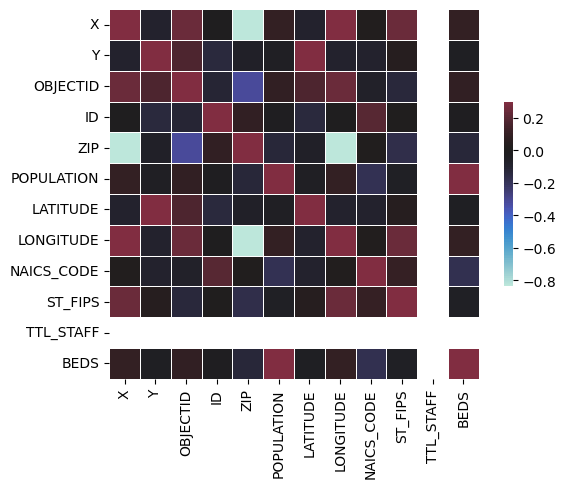

In [9]:
corr = num_df.corr()
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
categorycal_df.head()

,NAME,ADDRESS,CITY,STATE,ZIP4,TELEPHONE,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,NAICS_DESC,SOURCE,VAL_METHOD,WEBSITE,STATE_ID,ALT_NAME,OWNER,TRAUMA,HELIPAD
0,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,1700 JAMES BOWIE DRIVE,BAYTOWN,TX,unknow,(281) 420-8765,GENERAL ACUTE CARE,OPEN,HARRIS,48201,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.dshs.texas.gov/facilities/find-a-li...,IMAGERY,http://www.houstonmethodist.org/locations/san-...,unknow,unknow,NON-PROFIT,unknow,Y
1,TRINITY HOSPITALS,1 W BURDICK EXPY,MINOT,ND,unknow,(701) 857-5000,GENERAL ACUTE CARE,OPEN,WARD,38101,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.ndhealth.gov/hf/North_Dakota_Hospit...,IMAGERY,http://www.trinityhealth.org,5055A,unknow,NON-PROFIT,LEVEL II,Y
2,LIFEBRITE COMMUNITY HOSPITAL OF STOKES,1570 NC 8 & 89 HWY NORTH,DANBURY,NC,unknow,(336) 593-2831,GENERAL ACUTE CARE,OPEN,STOKES,37169,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,https://www2.ncdhhs.gov/dhsr/reports.htm,IMAGERY WITH OTHER,http://lifebritestokes.com/,unknow,PIONEER COMMUNITY HOSPITAL OF STOKES,PROPRIETARY,unknow,unknow
3,PROVIDENCE HOSPITAL OF NORTH HOUSTON LLC,16750 RED OAK DR,HOUSTON,TX,unknow,(281) 453-7110,GENERAL ACUTE CARE,OPEN,HARRIS,48021,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.dshs.texas.gov/facilities/find-a-li...,IMAGERY WITH OTHER,http://phnh.net/,unknow,unknow,PROPRIETARY,unknow,unknow
4,MCCALLEN MEDICAL CENTER,301 WEST EXPRESSWAY 83,MCALLEN,TX,unknow,(956) 632-4000,GENERAL ACUTE CARE,OPEN,HIDALGO,48215,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.dshs.texas.gov/facilities/find-a-li...,IMAGERY WITH OTHER,http://www.mcallenmedicalcenter.com/,unknow,unknow,PROPRIETARY,LEVEL III,Y


In [ ]:
fig, ax = plt.subplots()
categorycal_df['TYPE'].value_counts().plot(ax=ax, kind='bar')

In [ ]:
categorycal_df
categorycal_columns_names = list(categorycal_df.columns)
freq_col = [(len(categorycal_df[i].apply(lambda x: str(x)).unique()),i)for i in categorycal_columns_names]
selcted_col = [ x for (k,x) in freq_col if k < 20]

k = 0
for i in selcted_col:
  categorycal_df[i].value_counts().plot( kind='bar')
  plt.title(i)
  k+=1
  plt.show()
